In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import shapiro
from sklearn.model_selection import cross_val_score
import joblib
from joblib import load

# Test du modèle sur les données de prodction

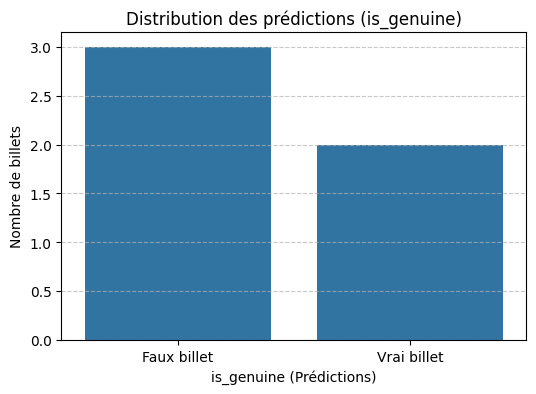


Distribution des prédictions :
is_genuine
False    3
True     2
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [13]:
rf_loaded = joblib.load('random_forest_model.pkl')
feature_names = joblib.load('feature_names.pkl')
new_df = pd.read_csv(r"C:\Users\maxim\Downloads\billets_test_maxime.csv")
new_X = new_df[feature_names]
new_df['is_genuine'] = rf_loaded.predict(new_X)

plt.figure(figsize=(6, 4))
sns.countplot(x=new_df['is_genuine'])
plt.title("Distribution des prédictions (is_genuine)")
plt.xlabel("is_genuine (Prédictions)")
plt.ylabel("Nombre de billets")
plt.xticks([0, 1], labels=["Faux billet", "Vrai billet"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

distribution = new_df['is_genuine'].value_counts()
print("\nDistribution des prédictions :")
print(distribution.to_string())
np.set_printoptions(precision=4, suppress=True)
print(rf_loaded.predict_proba(new_X))

In [14]:
results_df = new_df[['id', 'is_genuine']].copy()
results_df['authenticity'] = results_df['is_genuine'].map({True: "Vrai billet", False: "Faux billet"})
print(results_df)

    id  is_genuine authenticity
0  B_1        True  Vrai billet
1  B_2       False  Faux billet
2  B_3        True  Vrai billet
3  B_4       False  Faux billet
4  B_5       False  Faux billet
